In [209]:
# se cargan Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl #análisis de frecuencias
import statistics as stats #estadísticas como promedio 

## Carga y visualización de Archivos

Primero se cargan y visualiza la base de datos de Airbnb que incluye información de los hosts, casas en renta y ratings de estos. 

In [210]:
#Carga de archivos
mex = pd.read_csv("DF_Mexico.csv")

#Para poder ver bases completas cuando necesitamos info
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Visualización de la base original
mex.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2056638,https://www.airbnb.com/rooms/2056638,20230329041210,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,NaN,https://a0.muscache.com/pictures/28353712/4379...,10531228,https://www.airbnb.com/users/show/10531228,Maria,2013-12-09,"Mexico City, Mexico",NaN,within a day,100%,NaN,f,https://a0.muscache.com/im/users/10531228/prof...,https://a0.muscache.com/im/users/10531228/prof...,Coyoacán,3,7,['phone'],t,f,NaN,Coyoacán,NaN,19.35353,-99.16299,Entire loft,Entire home/apt,3,NaN,1.5 baths,1.0,1.0,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...","$1,434.00",1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,0,19,49,324,2023-03-30,21,0,0,2014-01-03,2018-06-24,4.95,4.71,4.95,5.00,4.95,5.00,4.86,NaN,f,3,3,0,0,0.19
1,2072354,https://www.airbnb.com/rooms/2072354,20230329041210,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,16840050,https://www.airbnb.com/users/show/16840050,Mónica,2014-06-16,"Mexico City, Mexico",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/635c8...,https://a0.muscache.com/im/pictures/user/635c8...,NaN,3,3,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",Coyoacán,NaN,19.35358,-99.16948,Entire guest suite,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Free street parking"", ""Cleaning products"", ""...",$830.00,3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,11,41,71,346,2023-03-30,61,1,0,2014-01-01,2022-11-04,4.85,4.90,4.88,4.93,5.00,4.95,4.84,NaN,f,2,2,0,0,0.54
2,696037,https://www.airbnb.com/rooms/696037,20230329041210,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,https://www.airbnb.com/users/show/3531879,Gonzalo & Sandra,2012-09-10,"Mexico City, Mexico",We are from CDMX and moved back and forth to N...,within an hour,100%,90%,t,https://a0.muscache.com/im/users/3531879/profi...,https://a0.muscache.com/im/users/3531879/profi...,Centro Histórico,4,4,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",Miguel Hidalgo,NaN,19.44180,-99.18402,Entire rental unit,Entire home/apt,6,NaN,2 baths,3.0,3.0,"[""Wifi \u2013 38 Mbps"", ""Central air condition...","$1,469.00",24,1125,24.0,24.0,1125.0,1125.0,24.0,1125.0,NaN,t,0,0,0,87,2023-03-29,39,2,0,2012-10-31,2022-12-21,4.57,4.82,4.71,4.92,4.92,4.58,4.71,NaN,f,3,3,0,0,0.31
3,35797,https://www.airbnb.com/rooms/35797,20230329041210,2023-03-2

In [211]:
#Información de la base
mex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24224 non-null  int64  
 1   listing_url                                   24224 non-null  object 
 2   scrape_id                                     24224 non-null  int64  
 3   last_scraped                                  24224 non-null  object 
 4   source                                        24224 non-null  object 
 5   name                                          24223 non-null  object 
 6   description                                   23296 non-null  object 
 7   neighborhood_overview                         15145 non-null  object 
 8   picture_url                                   24224 non-null  object 
 9   host_id                                       24224 non-null 

### Valores Nulos

Para limpiar la base de datos observamos los valores nulos que hay en nuestro data frame

#### Visualización

In [212]:
#Visualización del total de nulos
mex.isnull().sum().sum()

189609

In [213]:
#Visualización de nulos por columna
mex.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
name                                                1
description                                       928
neighborhood_overview                            9079
picture_url                                         0
host_id                                             0
host_url                                            0
host_name                                           0
host_since                                          0
host_location                                    5172
host_about                                      10664
host_response_time                               3091
host_response_rate                               3091
host_acceptance_rate                             2043
host_is_superhost           

Tratamiento de Nulos

Los nulos los trabajamos de distintas formas dependiendo del tipo de datos y a qué se refiere. El como fueron tratados se incluye en la siguiente lista

* String
    * "No Information About"
        * name
        * description
        * neighborhood_overview
        * host_location
        * host_about
        * host_response_time
        * host_neighbourhood
        * neighbourhood
        
    * "00/00/0000"
        * first_review
        * last_review
    * "W0"
        * host_is_superhost


* Mediana
    * bedrooms
    * beds
    * minimum_minimum_nights
    * maximum_minimum_nights
    * minimum_maximum_nights
    * maximum_maximum_nights
    * review_scores_value


* Media
    * maximum_maximum_nights
    * maximum_nights_avg_ntm
    * review_scores_rating
    * review_scores_accuracy
    * review_scores_cleanliness
    * review_scores_checkin
    * review_scores_communication
    * review_scores_location
    * review_scores_value
    * reviews_per_month
    * host_acceptance_rate
    * host_response_rate
    * bathrooms_text


* Eliminar columnas
    * neighbourhood_group_cleansed
    * bathrooms
    * calendar_updated
    * license

In [214]:
#Copia de Data Frame
mex2 = mex.copy()

In [215]:
#String 
    #No info
#Se agrupan las columnas a las que pondremos esta string a sus valores nulos y se cambian en el data frame
columnas_rellenar_no_info = ["name", "description", "neighborhood_overview", "host_location", "host_about", "host_response_time", "host_neighbourhood", "neighbourhood"]
mex2[columnas_rellenar_no_info] = mex2[columnas_rellenar_no_info].fillna("No information about")

In [216]:
#String
    #00/00/0000
mex2["first_review"] = mex2["first_review"].fillna("00/00/0000")
mex2["last_review"] = mex2["last_review"].fillna("00/00/0000")

In [217]:
#String 
    #Clave
mex2["host_is_superhost"] = mex2["host_is_superhost"].fillna("W0")

In [218]:
#Verificar nulos
mex2.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
name                                                0
description                                         0
neighborhood_overview                               0
picture_url                                         0
host_id                                             0
host_url                                            0
host_name                                           0
host_since                                          0
host_location                                       0
host_about                                          0
host_response_time                                  0
host_response_rate                               3091
host_acceptance_rate                             2043
host_is_superhost           

In [219]:
#Mediana
#Se agrupan las columnas que serán reemplazadas sus nulos por la mediana y se cambian en el data frame
columnas_rellenar_mediana = ["bedrooms", "beds", "review_scores_value", "minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights"]
mex2[columnas_rellenar_mediana] = mex2[columnas_rellenar_mediana].fillna(mex[columnas_rellenar_mediana].median())

In [220]:
#Verificamos nulos
mex2.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
name                                                0
description                                         0
neighborhood_overview                               0
picture_url                                         0
host_id                                             0
host_url                                            0
host_name                                           0
host_since                                          0
host_location                                       0
host_about                                          0
host_response_time                                  0
host_response_rate                               3091
host_acceptance_rate                             2043
host_is_superhost           

Problemas con la variable host_acceptance_rate, host_response_rate y bathrooms_text:

Las variables host_acceptance_rate y host_response_rate tienen símbolo de %, por lo que tuvieron que ser tratados de manera distinta, los pasos que se siguieron son los siguientes:

* Crear una nueva base con solo esta columna
* Quitar "%"
* Pasarlo a float
* Quitar valores nulos
* Calcular media
* Directamente cambiar en la columna del data frame con el valor de la media exacto, es decir, si la media fue 67, usar la línea:

    mex2["host_acceptance_rate"] = mex2["host_acceptance_rate"].fillna(67)
    
* Cambiarlo a float en el data frame en caso de ser necesario.

In [221]:
#HOST_ACCEPTANCE_RATE
#Se crea el nuevo df, se quita % y se pasa a float
host_acceptance_rate_df = mex.iloc[ : , [17]]
host_acceptance_rate_df = host_acceptance_rate_df["host_acceptance_rate"].str.replace("%", "").astype(float)
host_acceptance_rate_df.head()

0     NaN
1     NaN
2    90.0
3     NaN
4    86.0
Name: host_acceptance_rate, dtype: float64

In [222]:
#Calcular media quitando NAs
host_acceptance_rate_df = host_acceptance_rate_df.dropna()
print(stats.mean(host_acceptance_rate_df))

91.45624633695505


In [223]:
#Lo cambiamos en nuestro data frame original
mex2["host_acceptance_rate"] = mex2["host_acceptance_rate"].str.replace("%", "").astype(float)
mex2["host_acceptance_rate"] = mex2["host_acceptance_rate"].fillna(91.45)

In [224]:
#HOST_RESPONSE_RATE
#Se crea el nuevo df, se quita % y se pasa a float
host_response_rate_df = mex.iloc[ : , [16]]
host_response_rate_df = host_response_rate_df["host_response_rate"].str.replace("%", "").astype(float)
host_response_rate_df.head()

0    100.0
1      NaN
2    100.0
3      NaN
4    100.0
Name: host_response_rate, dtype: float64

In [225]:
#Calcular media quitando NAs
host_response_rate_df = host_response_rate_df.dropna()
print(stats.mean(host_response_rate_df))

94.53877821416742


In [226]:
#Lo cambiamos en nuestro data frame original
mex2["host_response_rate"] = mex2["host_response_rate"].str.replace("%", "").astype(float)
mex2["host_response_rate"] = mex2["host_response_rate"].fillna(94.53)

Para la variable bathrooms_text se siguieron los siguientes pasos:

* Crear un nuevo data frame solo con esa variable
* Se quitaron los valores nulos
* Se quitaron algunos strings como "bath", "baths", entre otros 
* Se volvieron a quitar valores nulos

In [227]:
#BATHROOMS_TEXT
 #Se crea el nuevo df, se quita % y se pasa a float
bathrooms_text_df = mex2.iloc[ : , [36]]
bathrooms_text_df = bathrooms_text_df.dropna()
bathrooms_text_df["bathrooms_text"] = bathrooms_text_df["bathrooms_text"].replace({"Half-bath": 0.5, "Shared half-bath":0.5, "Private half-bath":0.5, "":""}, regex = True)
bathrooms_text_df = bathrooms_text_df["bathrooms_text"].replace({"bath":"", "s":"", " ":"", "hared":"", "private":"", "Half-":""}, regex = True)
bathrooms_text_df = bathrooms_text_df.dropna()
bathrooms_floats = [float(elemento) for elemento in bathrooms_text_df]
bathrooms_floats
promedio_bathrooms = sum(bathrooms_floats) / len(bathrooms_floats)
print("Promedio:", promedio_bathrooms)

Promedio: 1.4592254277920145


In [228]:
#Lo cambiamos en nuestro data frame original
mex2["bathrooms_text"] = mex2["bathrooms_text"].replace({"Half-bath": 0.5, "Shared half-bath":0.5, "Private half-bath":0.5, "":""}, regex = True)
mex2["bathrooms_text"] = mex2["bathrooms_text"].replace({"bath":"", "s":"", " ":"", "hared":"", "private":"", "Half-":""}, regex = True)
mex2["bathrooms_text"] = mex2["bathrooms_text"].fillna(1.5)
mex2["bathrooms_text"] = mex2["bathrooms_text"].astype(float)

In [229]:
#Media
columnas_rellenar_media = ["maximum_maximum_nights", "maximum_nights_avg_ntm", "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value", "reviews_per_month", "minimum_nights_avg_ntm"]
mex2[columnas_rellenar_media] = mex2[columnas_rellenar_media].fillna(mex[columnas_rellenar_media].mean())

In [230]:
#Verificamos nulos
mex2.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
name                                                0
description                                         0
neighborhood_overview                               0
picture_url                                         0
host_id                                             0
host_url                                            0
host_name                                           0
host_since                                          0
host_location                                       0
host_about                                          0
host_response_time                                  0
host_response_rate                                  0
host_acceptance_rate                                0
host_is_superhost           

In [231]:
#Eliminar columnas
    #neighbourhood_group_cleansed
    #bathrooms
    #calendar_updated
    #license

mex2 = mex2.drop(["neighbourhood_group_cleansed", "bathrooms", "calendar_updated", "license"], axis=1)

In [232]:
#Verificamos nulos
mex2.isnull().sum()

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
name                                            0
description                                     0
neighborhood_overview                           0
picture_url                                     0
host_id                                         0
host_url                                        0
host_name                                       0
host_since                                      0
host_location                                   0
host_about                                      0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_thumbnail_url                              0


In [233]:
#Quitamos signo de pesos $ a price
mex2["price"] = mex2["price"].str.replace("$", "")
mex2["price"] = mex2["price"].replace({",":""}, regex = True).astype(float)
mex2["price"].head()

0     1434.0
1      830.0
2     1469.0
3     3658.0
4    18000.0
Name: price, dtype: float64

In [234]:
#Verificamos nulos completos
mex2.isnull().sum().sum()

0

### Valores atípicos

#### División de cuantitativos
 16  host_response_rate
 
 17  host_acceptance_rate

 22  host_listings_count                             
 23  host_total_listings_count                       

 33  accommodates                                   

 35  bedrooms                                       
 36  beds                                           

 39  minimum_nights                                  
 40  maximum_nights                                  
 41  minimum_minimum_nights                         
 42  maximum_minimum_nights                         
 43  minimum_maximum_nights                         
 44  maximum_maximum_nights                         
 45  minimum_nights_avg_ntm                         
 46  maximum_nights_avg_ntm                         

 48  availability_30                                 
 49  availability_60                                 
 50  availability_90                                 
 51  availability_365                               

 53  number_of_reviews                             
 54  number_of_reviews_ltm                         
 55  number_of_reviews_l30d                        

 58  review_scores_rating                          
 59  review_scores_accuracy                        
 60  review_scores_cleanliness                     
 61  review_scores_checkin                         
 62  review_scores_communication                   
 63  review_scores_location                        
 64  review_scores_value                           
 
 66  calculated_host_listings_count                
 67  calculated_host_listings_count_entire_homes   
 68  calculated_host_listings_count_private_rooms  
 69  calculated_host_listings_count_shared_rooms   
 70  reviews_per_month  


Price no porque no son outliers 

In [235]:
#Cuantitativas
cuan0 = mex2.iloc[ : , [16,17]]
cuan1 = mex2.iloc[ : , [22,23]] 
cuan2 = mex2.iloc[ : , [33, 34]]
cuan3 = mex2.iloc[ : , [35,36]]
cuan4 = mex2.iloc[ : , 39:47]   
cuan5 = mex2.iloc[ : , 48:52] 
cuan6 = mex2.iloc[ : , 53:56]
cuan7 = mex2.iloc[ : , 58:64]
cuan8 = mex2.iloc[ : , 66:71]
cuanti_mex = pd.concat([cuan0, cuan1, cuan2, cuan3, cuan4, cuan5, cuan6, cuan7, cuan8], axis=1)
cuanti_mex.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_listings_count',
       'host_total_listings_count', 'accommodates', 'bathrooms_text',
       'bedrooms', 'beds', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object')

In [236]:
columnas_a_eliminar = cuanti_mex.columns
cuali_mex = mex2.drop(columns=columnas_a_eliminar)
cuali_mex.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'amenities', 'price', 'has_availability',
       'calendar_last_scraped', 'first_review', 'last_review',
       'review_scores_value', 'instant_bookable'],
      dtype='object')

In [237]:
#Visualizamos info de nuevo df
cuanti_mex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 34 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_response_rate                            24224 non-null  float64
 1   host_acceptance_rate                          24224 non-null  float64
 2   host_listings_count                           24224 non-null  int64  
 3   host_total_listings_count                     24224 non-null  int64  
 4   accommodates                                  24224 non-null  int64  
 5   bathrooms_text                                24224 non-null  float64
 6   bedrooms                                      24224 non-null  float64
 7   beds                                          24224 non-null  float64
 8   minimum_nights                                24224 non-null  int64  
 9   maximum_nights                                24224 non-null 

#### Visualización de valores atípicos

<Figure size 1500x800 with 0 Axes>

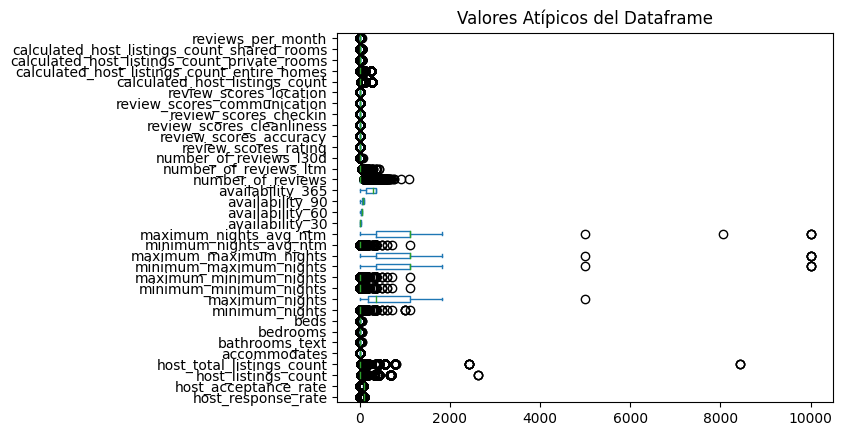

In [238]:
fig = plt.figure(figsize =(15, 8))
cuanti_mex.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

#### Tratamiento de Outliers
Por desviación estándar

In [239]:
#Tratamiento con desviación estándar
    #Marcamos límites
y = cuanti_mex
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido host_response_rate                               145.481643
host_acceptance_rate                             151.183671
host_listings_count                              252.830274
host_total_listings_count                        426.203015
accommodates                                       9.933140
bathrooms_text                                     4.339222
bedrooms                                           4.967931
beds                                               6.934289
minimum_nights                                    84.914542
maximum_nights                                  2018.371832
minimum_minimum_nights                            74.570464
maximum_minimum_nights                            75.639955
minimum_maximum_nights                          2164.914446
maximum_maximum_nights                          2164.364207
minimum_nights_avg_ntm                            74.890171
maximum_nights_avg_ntm                          2159.176276
availability_3

In [240]:
#Observamos valores atípicos del data frame
outliers_cuan_mex= cuanti_mex[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers_cuan_mex.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms_text,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,14.0,5.5,5.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [241]:
#Hacemos el cambio a un nuevo data frame
cuanti_mex_limpio_out = cuanti_mex[(y<=Limite_Superior)&(y>=Limite_Inferior)]
cuanti_mex_limpio_out.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms_text,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,100.00,91.45,3.0,7.0,3.0,1.5,1.0,1.0,1.0,1125.0,1.0,1.0,1125.0,1125.0,1.0,1125.0,0,19,49,324,21.0,0.0,0.0,4.950000,4.71000,4.950000,5.000000,4.950000,5.000000,3.0,3.0,0.0,0.0,0.190000
1,94.53,91.45,3.0,3.0,2.0,1.0,1.0,1.0,3.0,1125.0,3.0,3.0,1125.0,1125.0,3.0,1125.0,11,41,71,346,61.0,1.0,0.0,4.850000,4.90000,4.880000,4.930000,5.000000,4.950000,2.0,2.0,0.0,0.0,0.540000
2,100.00,90.00,4.0,4.0,6.0,2.0,3.0,3.0,24.0,1125.0,24.0,24.0,1125.0,1125.0,24.0,1125.0,0,0,0,87,39.0,2.0,0.0,4.570000,4.82000,4.710000,4.920000,4.920000,4.580000,3.0,3.0,0.0,0.0,0.310000
3,94.53,91.45,1.0,1.0,2.0,1.0,1.0,1.0,1.0,7.0,1.0,1.0,7.0,7.0,1.0,7.0,28,58,88,363,0.0,0.0,0.0,4.717754,4.77761,4.746342,4.827133,4.815533,4.832627,1.0,1.0,0.0,0.0,1.702435
4,100.00,86.00,16.0,16.0,NaN,NaN,NaN,NaN,1.0,365.0,1.0,1.0,365.0,365.0,1.0,365.0,30,59,89,357,64.0,12.0,1.0,4.580000,4.56000,4.700000,4.870000,4.780000,4.980000,12.0,3.0,2.0,0.0,0.460000


In [242]:
#Vemos valores nulos
cuanti_mex_limpio_out.isnull().sum()

host_response_rate                              716
host_acceptance_rate                            847
host_listings_count                             521
host_total_listings_count                       489
accommodates                                    537
bathrooms_text                                  334
bedrooms                                        299
beds                                            379
minimum_nights                                  178
maximum_nights                                    1
minimum_minimum_nights                          173
maximum_minimum_nights                          176
minimum_maximum_nights                            5
maximum_maximum_nights                            6
minimum_nights_avg_ntm                          174
maximum_nights_avg_ntm                            6
availability_30                                   0
availability_60                                   0
availability_90                                   0
availability

In [243]:
#Cambiamos nuevo nulos a media
cuanti_mex_limpio_out_mean = cuanti_mex_limpio_out.copy()
cuanti_mex_limpio_out_mean = cuanti_mex_limpio_out.fillna(cuanti_mex_limpio_out.mean())
cuanti_mex_limpio_out_mean.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms_text,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,100.00,91.45,3.0,7.0,3.00000,1.500000,1.000000,1.000000,1.0,1125.0,1.0,1.0,1125.0,1125.0,1.0,1125.0,0,19,49,324,21.0,0.0,0.0,4.950000,4.71000,4.950000,5.000000,4.950000,5.000000,3.0,3.0,0.0,0.0,0.190000
1,94.53,91.45,3.0,3.0,2.00000,1.000000,1.000000,1.000000,3.0,1125.0,3.0,3.0,1125.0,1125.0,3.0,1125.0,11,41,71,346,61.0,1.0,0.0,4.850000,4.90000,4.880000,4.930000,5.000000,4.950000,2.0,2.0,0.0,0.0,0.540000
2,100.00,90.00,4.0,4.0,6.00000,2.000000,3.000000,3.000000,24.0,1125.0,24.0,24.0,1125.0,1125.0,24.0,1125.0,0,0,0,87,39.0,2.0,0.0,4.570000,4.82000,4.710000,4.920000,4.920000,4.580000,3.0,3.0,0.0,0.0,0.310000
3,94.53,91.45,1.0,1.0,2.00000,1.000000,1.000000,1.000000,1.0,7.0,1.0,1.0,7.0,7.0,1.0,7.0,28,58,88,363,0.0,0.0,0.0,4.717754,4.77761,4.746342,4.827133,4.815533,4.832627,1.0,1.0,0.0,0.0,1.702435
4,100.00,86.00,16.0,16.0,3.06683,1.393198,1.467503,1.827888,1.0,365.0,1.0,1.0,365.0,365.0,1.0,365.0,30,59,89,357,64.0,12.0,1.0,4.580000,4.56000,4.700000,4.870000,4.780000,4.980000,12.0,3.0,2.0,0.0,0.460000


<Figure size 1500x800 with 0 Axes>

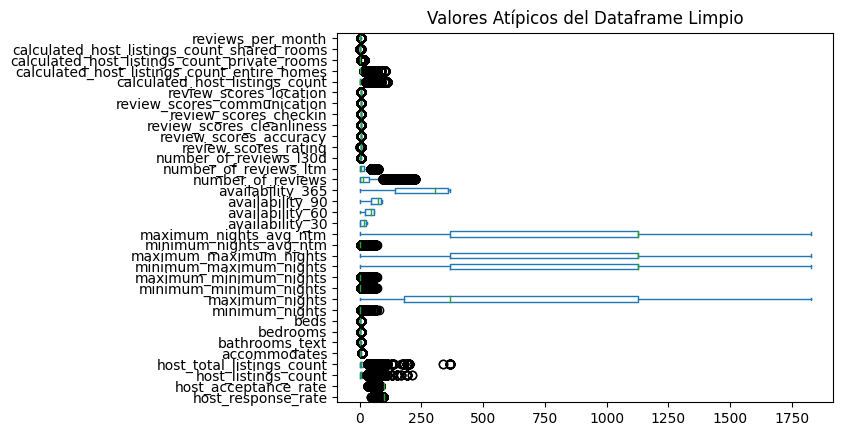

In [244]:
#Volvemos a observar en diagrama de cajas
fig = plt.figure(figsize =(15, 8))
cuanti_mex_limpio_out_mean.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe Limpio")
plt.show()

Juntamos los dos data frames

In [245]:
mex3 = pd.concat([cuanti_mex_limpio_out_mean, cuali_mex], axis = 1)
mex3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 71 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_response_rate                            24224 non-null  float64
 1   host_acceptance_rate                          24224 non-null  float64
 2   host_listings_count                           24224 non-null  float64
 3   host_total_listings_count                     24224 non-null  float64
 4   accommodates                                  24224 non-null  float64
 5   bathrooms_text                                24224 non-null  float64
 6   bedrooms                                      24224 non-null  float64
 7   beds                                          24224 non-null  float64
 8   minimum_nights                                24224 non-null  float64
 9   maximum_nights                                24224 non-null 

### Extracción de Datos

In [246]:
#a) host_acceptance_rate> 50%
host_acceptance_rate = mex3[(mex3["host_acceptance_rate"] > 50)]
host_acceptance_rate.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms_text,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,review_scores_value,instant_bookable
0,100.00,91.45,3.0,7.0,3.00000,1.500000,1.000000,1.000000,1.0,1125.0,1.0,1.0,1125.0,1125.0,1.0,1125.0,0,19,49,324,21.0,0.0,0.0,4.950000,4.71000,4.950000,5.000000,4.950000,5.000000,3.0,3.0,0.0,0.0,0.190000,2056638,https://www.airbnb.com/rooms/2056638,20230329041210,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,No information about,https://a0.muscache.com/pictures/28353712/4379...,10531228,https://www.airbnb.com/users/show/10531228,Maria,2013-12-09,"Mexico City, Mexico",No information about,within a day,f,https://a0.muscache.com/im/users/10531228/prof...,https://a0.muscache.com/im/users/10531228/prof...,Coyoacán,['phone'],t,f,No information about,Coyoacán,19.35353,-99.16299,Entire loft,Entire home/apt,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...",1434.0,t,2023-03-30,2014-01-03,2018-06-24,4.86,f
1,94.53,91.45,3.0,3.0,2.00000,1.000000,1.000000,1.000000,3.0,1125.0,3.0,3.0,1125.0,1125.0,3.0,1125.0,11,41,71,346,61.0,1.0,0.0,4.850000,4.90000,4.880000,4.930000,5.000000,4.950000,2.0,2.0,0.0,0.0,0.540000,2072354,https://www.airbnb.com/rooms/2072354,20230329041210,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,16840050,https://www.airbnb.com/users/show/16840050,Mónica,2014-06-16,"Mexico City, Mexico",No information about,No information about,f,https://a0.muscache.com/im/pictures/user/635c8...,https://a0.muscache.com/im/pictures/user/635c8...,No information about,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",Coyoacán,19.35358,-99.16948,Entire guest suite,Entire home/apt,"[""Free street parking"", ""Cleaning products"", ""...",830.0,t,2023-03-30,2014-01-01,2022-11-04,4.84,f
2,100.00,90.00,4.0,4.0,6.00000,2.000000,3.000000,3.000000,24.0,1125.0,24.0,24.0,1125.0,1125.0,24.0,1125.0,0,0,0,87,39.0,2.0,0.0,4.570000,4.82000,4.710000,4.920000,4.920000,4.580000,3.0,3.0,0.0,0.0,0.310000,696037,https://www.airbnb.com/rooms/696037,20230329041210,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,https://www.airbnb.com/users/show/3531879,Gonzalo & Sandra,2012-09-10,"Mexico City, Mexico",We are from CDMX and moved back and forth to N...,within an hour,t,https://a0.muscache.com/im/users/3531879/profi...,https://a0.muscache.com/im/users/3531879/profi...,Centro Histórico,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",Miguel Hidalgo,19.44180,-99.18402,Entire rental unit,

In [247]:
# b) Sólo los registros con categoría “superhost”
superhost = mex3[mex3["host_is_superhost"] == "t"]
superhost.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms_text,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,review_scores_value,instant_bookable
2,100.0,90.0,4.0,4.0,6.00000,2.000000,3.000000,3.000000,24.0,1125.0,24.0,24.0,1125.0,1125.0,24.0,1125.0,0,0,0,87,39.0,2.0,0.0,4.57,4.82,4.71,4.92,4.92,4.58,3.0,3.0,0.0,0.0,0.31,696037,https://www.airbnb.com/rooms/696037,20230329041210,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,https://www.airbnb.com/users/show/3531879,Gonzalo & Sandra,2012-09-10,"Mexico City, Mexico",We are from CDMX and moved back and forth to N...,within an hour,t,https://a0.muscache.com/im/users/3531879/profi...,https://a0.muscache.com/im/users/3531879/profi...,Centro Histórico,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",Miguel Hidalgo,19.44180,-99.18402,Entire rental unit,Entire home/apt,"[""Wifi \u2013 38 Mbps"", ""Central air condition...",1469.0,t,2023-03-29,2012-10-31,2022-12-21,4.71,f
6,100.0,95.0,2.0,6.0,2.00000,1.000000,1.000000,1.000000,3.0,250.0,3.0,3.0,250.0,250.0,3.0,250.0,0,0,0,144,84.0,15.0,0.0,4.87,4.95,4.88,4.98,4.94,4.75,1.0,1.0,0.0,0.0,0.58,56074,https://www.airbnb.com/rooms/56074,20230329041210,2023-03-29,city scrape,Great space in historical San Rafael,This great apartment is located in one of the ...,Very traditional neighborhood with all service...,https://a0.muscache.com/pictures/3005118/60dac...,265650,https://www.airbnb.com/users/show/265650,Maris,2010-10-19,"Mexico City, Mexico",I am a University Professor now retired after ...,within an hour,t,https://a0.muscache.com/im/users/265650/profil...,https://a0.muscache.com/im/users/265650/profil...,San Rafael,"['email', 'phone']",t,t,"Mexico City, DF, Mexico",Cuauhtémoc,19.43977,-99.15605,Entire condo,Entire home/apt,"[""Luggage dropoff allowed"", ""Long term stays a...",650.0,t,2023-03-29,2011-04-02,2023-01-21,4.79,f
7,100.0,100.0,2.0,3.0,2.00000,1.000000,1.000000,1.000000,2.0,1125.0,2.0,2.0,1125.0,1125.0,2.0,1125.0,18,48,78,168,62.0,6.0,0.0,4.92,4.89,4.90,4.92,4.95,4.94,2.0,0.0,2.0,0.0,0.94,61792,https://www.airbnb.com/rooms/61792,20230329041210,2023-03-30,city scrape,Spacious Clean Quiet room (own bath) in Condesa,"Located in La Condesa, one of the best neighbo...",You are going to be in one of the nicest neigh...,https://a0.muscache.com/pictures/4c674e38-42f8...,299558,https://www.airbnb.com/users/show/299558,Roberto,2010-11-26,"Mexico City, Mexico","I am a retired graphic designer, I like photog...",within an hour,t,https://a0.muscache.com/im/pictures/user/ff21a...,https://a0.muscache.com/im/pictures/user/ff21a...,Condesa,"['email', 'phone']",t,t,"Mexico City, Ciudad de México, Mexico",Cuauhtémoc,19.41083,-99.18057,Private room in home

In [248]:
#c) Los registros que no hallan verificado identidad “ not identity_verified”
host_identity_verified = mex3[mex3["host_identity_verified"] == "f"]
host_identity_verified.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms_text,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,review_scores_value,instant_bookable
0,100.00,91.450000,3.0,7.0,3.0,1.5,1.0,1.0,1.0,1125.0,1.0,1.0,1125.0,1125.0,1.0,1125.0,0,19,49,324,21.0,0.0,0.0,4.950000,4.71000,4.950000,5.000000,4.950000,5.000000,3.0,3.0,0.0,0.0,0.190000,2056638,https://www.airbnb.com/rooms/2056638,20230329041210,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,No information about,https://a0.muscache.com/pictures/28353712/4379...,10531228,https://www.airbnb.com/users/show/10531228,Maria,2013-12-09,"Mexico City, Mexico",No information about,within a day,f,https://a0.muscache.com/im/users/10531228/prof...,https://a0.muscache.com/im/users/10531228/prof...,Coyoacán,['phone'],t,f,No information about,Coyoacán,19.35353,-99.16299,Entire loft,Entire home/apt,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...",1434.0,t,2023-03-30,2014-01-03,2018-06-24,4.86,f
21,100.00,91.450000,3.0,4.0,2.0,1.0,1.0,1.0,1.0,730.0,1.0,1.0,730.0,730.0,1.0,730.0,28,58,88,88,0.0,0.0,0.0,4.717754,4.77761,4.746342,4.827133,4.815533,4.832627,3.0,1.0,2.0,0.0,1.702435,131610,https://www.airbnb.com/rooms/131610,20230329041210,2023-03-29,city scrape,MARIA DEL ALMA,<b>The space</b><br />VIVE LA EXPERIENCIA DE C...,No information about,https://a0.muscache.com/pictures/837085/b9ed71...,647454,https://www.airbnb.com/users/show/647454,Fernando,2011-05-31,"Mexico City, Mexico",No information about,within a few hours,f,https://a0.muscache.com/im/pictures/user/0e667...,https://a0.muscache.com/im/pictures/user/0e667...,Coyoacán,['phone'],t,f,No information about,Coyoacán,19.35416,-99.16488,Private room,Private room,"[""Patio or balcony"", ""Wifi"", ""Breakfast"", ""Lug...",1244.0,t,2023-03-29,00/00/0000,00/00/0000,4.82,f
61,94.53,91.450000,1.0,1.0,2.0,1.0,1.0,1.0,7.0,365.0,7.0,7.0,365.0,365.0,7.0,365.0,0,0,0,0,0.0,0.0,0.0,4.717754,4.77761,4.746342,4.827133,4.815533,4.832627,1.0,1.0,0.0,0.0,1.702435,276504,https://www.airbnb.com/rooms/276504,20230329041210,2023-03-30,previous scrape,High End Condo with golf package,<b>The space</b><br />I own several weeks at h...,No information about,https://a0.muscache.com/pictures/2802432/4be14...,1444589,https://www.airbnb.com/users/show/1444589,Michael,2011-11-26,No information about,No information about,No information about,f,https://a0.muscache.com/im/users/1444589/profi...,https://a0.muscache.com/im/users/1444589/profi...,No information about,"['email', 'phone']",t,f,No information about,Iztacalco,19.38061,-99.12729,Entire rental unit,Entire home/apt,"[""Elevator"", ""Wifi"", ""Washer"", ""Kitchen"", ""Poo...",1815.0,f,2023-03-30,00/00/0000,00/00/0000,4.82,f
68,94.53,94.649286,1.0,1.0,1.0,1.0,1.0,1.0,2.0,14.0,2.0,2.0,14.0,14.0,2.0,14.0,30,60,90,365,0.0,0.0,0.0,4.717754,4.77761,4.746342,4.827133,

In [249]:
#d) Los registro cuyo property_type = “Private room” y “Hotel room”
private_hotel_room = mex3[(mex3["property_type"] == "Private room") | (mex3["property_type"] == "Hotel room")]
private_hotel_room.head()


,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms_text,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,review_scores_value,instant_bookable
21,100.0,91.45,3.0,4.0,2.0,1.0,1.0,1.0,1.0,730.0,1.0,1.0,730.0,730.0,1.0,730.0,28,58,88,88,0.0,0.0,0.0,4.717754,4.77761,4.746342,4.827133,4.815533,4.832627,3.0,1.0,2.0,0.0,1.702435,131610,https://www.airbnb.com/rooms/131610,20230329041210,2023-03-29,city scrape,MARIA DEL ALMA,<b>The space</b><br />VIVE LA EXPERIENCIA DE C...,No information about,https://a0.muscache.com/pictures/837085/b9ed71...,647454,https://www.airbnb.com/users/show/647454,Fernando,2011-05-31,"Mexico City, Mexico",No information about,within a few hours,f,https://a0.muscache.com/im/pictures/user/0e667...,https://a0.muscache.com/im/pictures/user/0e667...,Coyoacán,['phone'],t,f,No information about,Coyoacán,19.354160,-99.164880,Private room,Private room,"[""Patio or balcony"", ""Wifi"", ""Breakfast"", ""Lug...",1244.0,t,2023-03-29,00/00/0000,00/00/0000,4.82,f
1062,100.0,100.00,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1125.0,2.0,4.0,1125.0,1125.0,2.4,1125.0,30,60,90,365,15.0,2.0,0.0,4.930000,4.80000,4.930000,4.930000,5.000000,4.800000,1.0,0.0,1.0,0.0,0.210000,12271259,https://www.airbnb.com/rooms/12271259,20230329041210,2023-03-29,city scrape,"Artist Studio in CDMX, big terrace","A creative, unique and vibrant oasis in the he...",Iztacalco is the oldest neighbor in Mexico Cit...,https://a0.muscache.com/pictures/2e640271-4a05...,2556582,https://www.airbnb.com/users/show/2556582,Hector,2012-06-05,"Mexico City, Mexico",Hector is a designer and consultant on sustain...,within an hour,f,https://a0.muscache.com/im/pictures/user/adeee...,https://a0.muscache.com/im/pictures/user/adeee...,No information about,"['email', 'phone', 'work_email']",t,t,"Ciudad de Mexico, Iztacalco, Mexico",Iztacalco,19.390573,-99.129798,Private room,Private room,"[""Ethernet connection"", ""Smoke alarm"", ""Free s...",748.0,t,2023-03-29,2017-05-23,2022-11-21,4.73,f
2670,50.0,100.00,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1125.0,1.0,1.0,1125.0,1125.0,1.0,1125.0,23,53,83,358,1.0,1.0,0.0,4.771305,4.82377,4.788369,4.866597,4.855156,4.866061,1.0,0.0,1.0,0.0,0.940000,19639981,https://www.airbnb.com/rooms/19639981,20230329041210,2023-03-29,city scrape,Tanke hause,A 15 minutos de coyoacan metro taxqueña esta s...,No information about,https://a0.muscache.com/pictures/97a2b1cd-b4c6...,136125882,https://www.airbnb.com/users/show/136125882,Fernando,2017-06-20,"Mexico City, Mexico",No information about,within a day,f,https://a0.muscache.com/im/pictures/user/4e216...,https://a0.muscache.com/im/pictures/user/4e216...,No information about,"['email', 'phone']",t,f,No information about,Coyoacán,19.341660,-99.150350,Private room,Private room,"[""Wifi"", ""Breakfast"", ""Washer"", ""Smoking allow...",181.0,t,2023-03-29,2023-02-26,2023-02-26,1.00,t
2805,50.0,100.00,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1125.0,

In [250]:
# Los registros que cuenten con bathroom > 1
bano_mas_1 = mex3[mex3["bathrooms_text"] > 1]
bano_mas_1.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms_text,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,review_scores_value,instant_bookable
0,100.0,91.45,3.0,7.0,3.00000,1.500000,1.000000,1.000000,1.0,1125.0,1.0,1.0,1125.0,1125.0,1.0,1125.0,0,19,49,324,21.0,0.0,0.0,4.95,4.71,4.95,5.00,4.95,5.00,3.0,3.0,0.0,0.0,0.19,2056638,https://www.airbnb.com/rooms/2056638,20230329041210,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,No information about,https://a0.muscache.com/pictures/28353712/4379...,10531228,https://www.airbnb.com/users/show/10531228,Maria,2013-12-09,"Mexico City, Mexico",No information about,within a day,f,https://a0.muscache.com/im/users/10531228/prof...,https://a0.muscache.com/im/users/10531228/prof...,Coyoacán,['phone'],t,f,No information about,Coyoacán,19.35353,-99.16299,Entire loft,Entire home/apt,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...",1434.0,t,2023-03-30,2014-01-03,2018-06-24,4.86,f
2,100.0,90.00,4.0,4.0,6.00000,2.000000,3.000000,3.000000,24.0,1125.0,24.0,24.0,1125.0,1125.0,24.0,1125.0,0,0,0,87,39.0,2.0,0.0,4.57,4.82,4.71,4.92,4.92,4.58,3.0,3.0,0.0,0.0,0.31,696037,https://www.airbnb.com/rooms/696037,20230329041210,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,https://www.airbnb.com/users/show/3531879,Gonzalo & Sandra,2012-09-10,"Mexico City, Mexico",We are from CDMX and moved back and forth to N...,within an hour,t,https://a0.muscache.com/im/users/3531879/profi...,https://a0.muscache.com/im/users/3531879/profi...,Centro Histórico,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",Miguel Hidalgo,19.44180,-99.18402,Entire rental unit,Entire home/apt,"[""Wifi \u2013 38 Mbps"", ""Central air condition...",1469.0,t,2023-03-29,2012-10-31,2022-12-21,4.71,f
4,100.0,86.00,16.0,16.0,3.06683,1.393198,1.467503,1.827888,1.0,365.0,1.0,1.0,365.0,365.0,1.0,365.0,30,59,89,357,64.0,12.0,1.0,4.58,4.56,4.70,4.87,4.78,4.98,12.0,3.0,2.0,0.0,0.46,44616,https://www.airbnb.com/rooms/44616,20230329041210,2023-03-30,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,No information about,https://a0.muscache.com/pictures/251410/ec75fe...,196253,https://www.airbnb.com/users/show/196253,Condesa Haus Bed & Breakfast CDMX,2010-08-09,"Mexico City, Mexico",Condesa Haus is Bed & Breakfast located on th...,within an hour,f,https://a0.muscache.com/im/users/196253/profil...,https://a0.muscache.com/im/users/196253/profil...,Condesa,"['email', 'phone', 'work_email']",t,t,No information about,Cuauhtémoc,19.41162,-99.17794,Entire home,Entire home/apt,"[""Free street parking"", ""Security cameras on p...",18000.0,t,2023-03-30,2011-11-09,2023-03-26,4

In [251]:
# f) Los registros cuyo precio sea mayor de $10,000 y que sean de tipo “Entire home”
home = mex3[(mex3["price"] > 10000.00) & (mex3["property_type"] == "Entire home")]
home.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms_text,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,review_scores_value,instant_bookable
4,100.00,86.00,16.0,16.0,3.06683,1.393198,1.467503,1.827888,1.0,365.0,1.0,1.0,365.0,365.0,1.0,365.0,30,59,89,357,64.0,12.0,1.0,4.58,4.56,4.70,4.87,4.78,4.98,12.0,3.0,2.0,0.0,0.46,44616,https://www.airbnb.com/rooms/44616,20230329041210,2023-03-30,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,No information about,https://a0.muscache.com/pictures/251410/ec75fe...,196253,https://www.airbnb.com/users/show/196253,Condesa Haus Bed & Breakfast CDMX,2010-08-09,"Mexico City, Mexico",Condesa Haus is Bed & Breakfast located on th...,within an hour,f,https://a0.muscache.com/im/users/196253/profil...,https://a0.muscache.com/im/users/196253/profil...,Condesa,"['email', 'phone', 'work_email']",t,t,No information about,Cuauhtémoc,19.41162,-99.17794,Entire home,Entire home/apt,"[""Free street parking"", ""Security cameras on p...",18000.0,t,2023-03-30,2011-11-09,2023-03-26,4.48,f
1524,80.00,46.00,7.0,9.0,3.06683,1.393198,1.467503,1.827888,2.0,20.0,2.0,2.0,20.0,20.0,2.0,20.0,24,44,74,345,28.0,6.0,0.0,4.81,4.92,4.85,4.96,4.88,4.92,5.0,2.0,3.0,0.0,0.46,15145820,https://www.airbnb.com/rooms/15145820,20230329041210,2023-03-30,city scrape,La Casita de Coyoacán (Casa completa 21 huéspe...,Casa para 21 huéspedes.<br />Contamos con rece...,"Restaurantes, tiendas, bares, supermercados, t...",https://a0.muscache.com/pictures/45d0f0f3-7f21...,96060539,https://www.airbnb.com/users/show/96060539,La Casita De Coyoacán,2016-09-20,No information about,No information about,within a day,t,https://a0.muscache.com/im/pictures/user/f5ded...,https://a0.muscache.com/im/pictures/user/f5ded...,Coyoacán,"['email', 'phone']",t,t,"Mexico City, Ciudad de México, Mexico",Coyoacán,19.35100,-99.15279,Entire home,Entire home/apt,"[""Smoke alarm"", ""Free street parking"", ""Luggag...",12345.0,t,2023-03-30,2018-03-20,2023-02-20,4.88,f
1855,100.00,82.00,7.0,11.0,7.00000,2.500000,3.000000,6.000000,1.0,1000.0,1.0,1.0,1000.0,1000.0,1.0,1000.0,30,60,90,365,15.0,1.0,0.0,4.87,4.60,4.93,4.93,4.93,4.93,7.0,7.0,0.0,0.0,0.20,15816189,https://www.airbnb.com/rooms/15816189,20230329041210,2023-03-30,city scrape,Beautiful House in the heart of the city !,Hello! Welcome to Mexico City. We kindly offer...,We're located in one of the best and safest ne...,https://a0.muscache.com/pictures/d991ade9-ac4b...,102373818,https://www.airbnb.com/users/show/102373818,Fabiola,2016-11-03,Mexico,"I’m a very friendly person, my passion is to t...",within a few hours,f,https://a0.muscache.com/im/pictures/user/5f8e6...,https://a0.muscache.com/im/pictures/user/5f8e6...,Coyoacán,"['email', 'phone', 'work_email']",t,t,"Mexico City, Ciudad de México, Mexico",Coyoacán,19.34543,-99.16193,Entire home,Entire home/apt,"[""Free street parking"", ""Lugga

In [252]:
#g) Los registros cuyo review_scores_cleanliness > 4.5
score_cleanliness = mex3[mex3["review_scores_cleanliness"] > 4.5]
score_cleanliness.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms_text,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,review_scores_value,instant_bookable
0,100.00,91.45,3.0,7.0,3.00000,1.500000,1.000000,1.000000,1.0,1125.0,1.0,1.0,1125.0,1125.0,1.0,1125.0,0,19,49,324,21.0,0.0,0.0,4.950000,4.71000,4.950000,5.000000,4.950000,5.000000,3.0,3.0,0.0,0.0,0.190000,2056638,https://www.airbnb.com/rooms/2056638,20230329041210,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,No information about,https://a0.muscache.com/pictures/28353712/4379...,10531228,https://www.airbnb.com/users/show/10531228,Maria,2013-12-09,"Mexico City, Mexico",No information about,within a day,f,https://a0.muscache.com/im/users/10531228/prof...,https://a0.muscache.com/im/users/10531228/prof...,Coyoacán,['phone'],t,f,No information about,Coyoacán,19.35353,-99.16299,Entire loft,Entire home/apt,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...",1434.0,t,2023-03-30,2014-01-03,2018-06-24,4.86,f
1,94.53,91.45,3.0,3.0,2.00000,1.000000,1.000000,1.000000,3.0,1125.0,3.0,3.0,1125.0,1125.0,3.0,1125.0,11,41,71,346,61.0,1.0,0.0,4.850000,4.90000,4.880000,4.930000,5.000000,4.950000,2.0,2.0,0.0,0.0,0.540000,2072354,https://www.airbnb.com/rooms/2072354,20230329041210,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,16840050,https://www.airbnb.com/users/show/16840050,Mónica,2014-06-16,"Mexico City, Mexico",No information about,No information about,f,https://a0.muscache.com/im/pictures/user/635c8...,https://a0.muscache.com/im/pictures/user/635c8...,No information about,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",Coyoacán,19.35358,-99.16948,Entire guest suite,Entire home/apt,"[""Free street parking"", ""Cleaning products"", ""...",830.0,t,2023-03-30,2014-01-01,2022-11-04,4.84,f
2,100.00,90.00,4.0,4.0,6.00000,2.000000,3.000000,3.000000,24.0,1125.0,24.0,24.0,1125.0,1125.0,24.0,1125.0,0,0,0,87,39.0,2.0,0.0,4.570000,4.82000,4.710000,4.920000,4.920000,4.580000,3.0,3.0,0.0,0.0,0.310000,696037,https://www.airbnb.com/rooms/696037,20230329041210,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,https://www.airbnb.com/users/show/3531879,Gonzalo & Sandra,2012-09-10,"Mexico City, Mexico",We are from CDMX and moved back and forth to N...,within an hour,t,https://a0.muscache.com/im/users/3531879/profi...,https://a0.muscache.com/im/users/3531879/profi...,Centro Histórico,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",Miguel Hidalgo,19.44180,-99.18402,Entire rental unit,

In [253]:
# h) Los registros cuyo review_scores_value > 4.9
review_scores_value =  mex3[mex3["review_scores_value"] > 4.9]
review_scores_value.head()


,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms_text,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,review_scores_value,instant_bookable
10,100.0,98.0,7.0,7.0,3.0,1.0,1.0,2.0,3.0,1125.0,3.0,3.0,1125.0,1125.0,3.0,1125.0,4,33,63,153,29.75038,36.0,1.0,4.93,4.94,4.96,5.00,4.99,4.95,3.0,3.0,0.0,0.0,2.63,2083241,https://www.airbnb.com/rooms/2083241,20230329041210,2023-03-30,city scrape,Condesa Apartment in 1920s Landmarked Art Nouv...,This newly redecorated (after these photos wer...,"Stroll in Parque Mexico and Parque Espana, jus...",https://a0.muscache.com/pictures/miso/Hosting-...,8282570,https://www.airbnb.com/users/show/8282570,Thomas,2013-08-20,"Mexico City, Mexico",HI! I'm from New York. Came to Mexico 20 yea...,within an hour,t,https://a0.muscache.com/im/users/8282570/profi...,https://a0.muscache.com/im/users/8282570/profi...,Roma Norte,"['email', 'phone']",t,t,"Mexico City, DF, Mexico",Cuauhtémoc,19.41530,-99.16763,Entire rental unit,Entire home/apt,"[""Smoke alarm"", ""Luggage dropoff allowed"", ""Lo...",1881.0,t,2023-03-30,2014-10-03,2023-03-13,4.91,f
11,75.0,73.0,3.0,5.0,4.0,1.0,2.0,2.0,4.0,30.0,4.0,4.0,30.0,30.0,4.0,30.0,27,57,87,362,47.00000,7.0,0.0,4.89,4.80,4.73,4.93,4.91,4.98,2.0,2.0,0.0,0.0,0.34,67703,https://www.airbnb.com/rooms/67703,20230329041210,2023-03-30,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",No information about,https://a0.muscache.com/pictures/3281720/6f078...,334451,https://www.airbnb.com/users/show/334451,Nicholas,2011-01-04,"Mexico City, Mexico","I am a journalist writing about food, (book an...",within a day,f,https://a0.muscache.com/im/users/334451/profil...,https://a0.muscache.com/im/users/334451/profil...,Hipódromo,"['email', 'phone']",t,t,No information about,Cuauhtémoc,19.41152,-99.16857,Entire rental unit,Entire home/apt,"[""Record player"", ""Extra pillows and blankets""...",2088.0,t,2023-03-30,2011-11-17,2023-01-01,4.91,f
13,100.0,100.0,3.0,4.0,2.0,1.0,1.0,1.0,7.0,180.0,7.0,7.0,180.0,180.0,7.0,180.0,0,21,21,145,114.00000,5.0,0.0,4.90,4.90,4.95,4.95,4.98,4.96,3.0,2.0,1.0,0.0,0.84,70644,https://www.airbnb.com/rooms/70644,20230329041210,2023-03-29,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,212109,https://www.airbnb.com/users/show/212109,Trisha,2010-08-24,"Mexico City, Mexico","I am a mother, documentary film maker and phot...",within a day,t,https://a0.muscache.com/im/users/212109/profil...,https://a0.muscache.com/im/users/212109/profil...,Coyoacán,"['email', 'phone', 'work_email']",t,t,"Mexico City, Federal District, Mexico",Coyoacán,19.35448,-99.16217,Entire rental unit,Entire home/apt,"[""Smoke alarm"", ""Free street parking"", ""Luggag...",1097.0,t,2023-03-29,2012-02

In [254]:
# i) Los registros cuya availability_365< 100
availability_365 =  mex3[mex3["availability_365"] < 100]
availability_365.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms_text,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,review_scores_value,instant_bookable
2,100.0,90.00,4.0,4.0,6.0,2.0,3.0,3.0,24.0,1125.0,24.0,24.0,1125.0,1125.0,24.0,1125.0,0,0,0,87,39.0,2.0,0.0,4.570000,4.82000,4.710000,4.920000,4.920000,4.580000,3.0,3.0,0.0,0.0,0.310000,696037,https://www.airbnb.com/rooms/696037,20230329041210,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,https://www.airbnb.com/users/show/3531879,Gonzalo & Sandra,2012-09-10,"Mexico City, Mexico",We are from CDMX and moved back and forth to N...,within an hour,t,https://a0.muscache.com/im/users/3531879/profi...,https://a0.muscache.com/im/users/3531879/profi...,Centro Histórico,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",Miguel Hidalgo,19.44180,-99.18402,Entire rental unit,Entire home/apt,"[""Wifi \u2013 38 Mbps"", ""Central air condition...",1469.0,t,2023-03-29,2012-10-31,2022-12-21,4.71,f
21,100.0,91.45,3.0,4.0,2.0,1.0,1.0,1.0,1.0,730.0,1.0,1.0,730.0,730.0,1.0,730.0,28,58,88,88,0.0,0.0,0.0,4.717754,4.77761,4.746342,4.827133,4.815533,4.832627,3.0,1.0,2.0,0.0,1.702435,131610,https://www.airbnb.com/rooms/131610,20230329041210,2023-03-29,city scrape,MARIA DEL ALMA,<b>The space</b><br />VIVE LA EXPERIENCIA DE C...,No information about,https://a0.muscache.com/pictures/837085/b9ed71...,647454,https://www.airbnb.com/users/show/647454,Fernando,2011-05-31,"Mexico City, Mexico",No information about,within a few hours,f,https://a0.muscache.com/im/pictures/user/0e667...,https://a0.muscache.com/im/pictures/user/0e667...,Coyoacán,['phone'],t,f,No information about,Coyoacán,19.35416,-99.16488,Private room,Private room,"[""Patio or balcony"", ""Wifi"", ""Breakfast"", ""Lug...",1244.0,t,2023-03-29,00/00/0000,00/00/0000,4.82,f
26,91.0,95.00,3.0,3.0,6.0,3.0,3.0,4.0,2.0,180.0,2.0,2.0,1125.0,1125.0,2.0,1125.0,29,59,88,88,215.0,31.0,1.0,4.910000,4.94000,4.920000,4.960000,4.960000,4.870000,3.0,3.0,0.0,0.0,1.930000,2118573,https://www.airbnb.com/rooms/2118573,20230329041210,2023-03-30,city scrape,Walk to WTC from a Family Apartment in a Trend...,The flat will give you the chance to live Mexi...,The apartment is in the fashionable and quiet ...,https://a0.muscache.com/pictures/bfae5c71-fb21...,10802698,https://www.airbnb.com/users/show/10802698,Hector,2013-12-25,"Mexico City, Mexico",Always looking forward to meeting new people a...,within an hour,t,https://a0.muscache.com/im/users/10802698/prof...,https://a0.muscache.com/im/users/10802698/prof...,Nápoles,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",Benito Juárez,19.38777,-99.17532,Entire rental unit,Entire home/apt,"[""Smoke alarm"", ""Luggage dropoff al

In [255]:
# j) Los registros cuya host_response_time sea “within an hour”
host_response_time =  mex3[mex3["host_response_time"] == "within an hour" ]
host_response_time.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms_text,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,review_scores_value,instant_bookable
2,100.0,90.0,4.0,4.0,6.00000,2.000000,3.000000,3.000000,24.0,1125.0,24.0,24.0,1125.0,1125.0,24.0,1125.0,0,0,0,87,39.0,2.0,0.0,4.57,4.82,4.71,4.92,4.92,4.58,3.0,3.0,0.0,0.0,0.31,696037,https://www.airbnb.com/rooms/696037,20230329041210,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,https://www.airbnb.com/users/show/3531879,Gonzalo & Sandra,2012-09-10,"Mexico City, Mexico",We are from CDMX and moved back and forth to N...,within an hour,t,https://a0.muscache.com/im/users/3531879/profi...,https://a0.muscache.com/im/users/3531879/profi...,Centro Histórico,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",Miguel Hidalgo,19.44180,-99.18402,Entire rental unit,Entire home/apt,"[""Wifi \u2013 38 Mbps"", ""Central air condition...",1469.0,t,2023-03-29,2012-10-31,2022-12-21,4.71,f
4,100.0,86.0,16.0,16.0,3.06683,1.393198,1.467503,1.827888,1.0,365.0,1.0,1.0,365.0,365.0,1.0,365.0,30,59,89,357,64.0,12.0,1.0,4.58,4.56,4.70,4.87,4.78,4.98,12.0,3.0,2.0,0.0,0.46,44616,https://www.airbnb.com/rooms/44616,20230329041210,2023-03-30,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,No information about,https://a0.muscache.com/pictures/251410/ec75fe...,196253,https://www.airbnb.com/users/show/196253,Condesa Haus Bed & Breakfast CDMX,2010-08-09,"Mexico City, Mexico",Condesa Haus is Bed & Breakfast located on th...,within an hour,f,https://a0.muscache.com/im/users/196253/profil...,https://a0.muscache.com/im/users/196253/profil...,Condesa,"['email', 'phone', 'work_email']",t,t,No information about,Cuauhtémoc,19.41162,-99.17794,Entire home,Entire home/apt,"[""Free street parking"", ""Security cameras on p...",18000.0,t,2023-03-30,2011-11-09,2023-03-26,4.48,f
6,100.0,95.0,2.0,6.0,2.00000,1.000000,1.000000,1.000000,3.0,250.0,3.0,3.0,250.0,250.0,3.0,250.0,0,0,0,144,84.0,15.0,0.0,4.87,4.95,4.88,4.98,4.94,4.75,1.0,1.0,0.0,0.0,0.58,56074,https://www.airbnb.com/rooms/56074,20230329041210,2023-03-29,city scrape,Great space in historical San Rafael,This great apartment is located in one of the ...,Very traditional neighborhood with all service...,https://a0.muscache.com/pictures/3005118/60dac...,265650,https://www.airbnb.com/users/show/265650,Maris,2010-10-19,"Mexico City, Mexico",I am a University Professor now retired after ...,within an hour,t,https://a0.muscache.com/im/users/265650/profil...,https://a0.muscache.com/im/users/265650/profil...,San Rafael,"['email', 'phone']",t,t,"Mexico City, DF, Mexico",Cuauhtémoc,19.43977,-99.15605,Entire condo,Entire home/apt,"[""Luggage dropoff allowed"", ""Lo

#### Visualización de datos

Porcentaje de Aceptación de acuerdo a si es un Host verificado o no

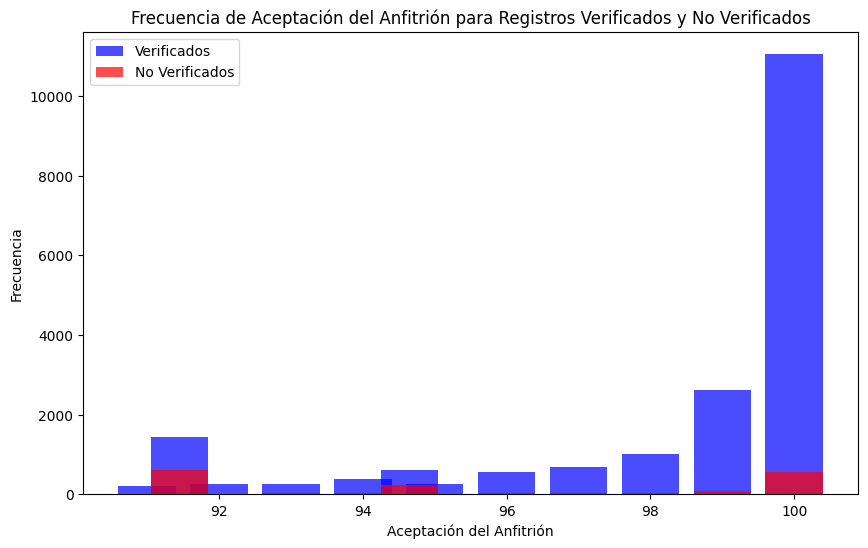

In [256]:
# Filtrar el DataFrame para incluir solo registros verificados y aceptación mayor a 90
verificados = mex3[(mex3["host_identity_verified"] == "t") & (mex3["host_acceptance_rate"] > 90)]
no_verificados = mex3[(mex3["host_identity_verified"] == "f") & (mex3["host_acceptance_rate"] > 90)]

# Crear una figura con subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Crear tablas de frecuencias de aceptación del anfitrión para los registros verificados y no verificados
freq_table_verificados = verificados["host_acceptance_rate"].value_counts()
freq_table_no_verificados = no_verificados["host_acceptance_rate"].value_counts()

# Crear histogramas de los resultados para verificados y no verificados
ax.bar(freq_table_verificados.index, freq_table_verificados, color='blue', alpha=0.7, label='Verificados')
ax.bar(freq_table_no_verificados.index, freq_table_no_verificados, color='red', alpha=0.7, label='No Verificados')

ax.set_title("Frecuencia de Aceptación del Anfitrión para Registros Verificados y No Verificados")
ax.set_xlabel("Aceptación del Anfitrión")
ax.set_ylabel("Frecuencia")
ax.legend()

plt.show()


Precio y rating de la casa

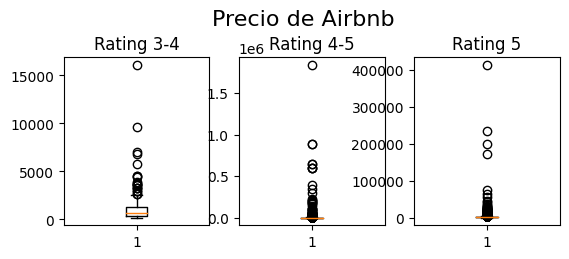

In [257]:
#Creamos categorías de rating
rat0 = mex3[mex3["review_scores_rating"] < 1]
rat1 = mex3[(mex3["review_scores_rating"] >= 1) & (mex3["review_scores_rating"] < 2)]
rat2 = mex3[(mex3["review_scores_rating"] >= 2) & (mex3["review_scores_rating"] < 3)]
rat3 = mex3[(mex3["review_scores_rating"] >= 3) & (mex3["review_scores_rating"] < 4)]
rat4 = mex3[(mex3["review_scores_rating"] >= 4) & (mex3["review_scores_rating"] < 5)]
rat5 = mex3[(mex3["review_scores_rating"] >= 5) & (mex3["review_scores_rating"] < 6)]

# rat0, rat1 y rat2 no tienen datos

plt.subplot(231)
plt.boxplot(rat3["price"])
plt.title("Rating 3-4")

plt.subplot(232)
plt.boxplot(rat4["price"])
plt.title("Rating 4-5")

plt.subplot(233)
plt.boxplot(rat5["price"])
plt.title("Rating 5")

plt.suptitle("Precio de Airbnb", fontsize=16)

plt.show()

Calificación de la comunicación y efectividad de la respuesta del host

Text(0, 0.5, 'Calificación de la comunicación')

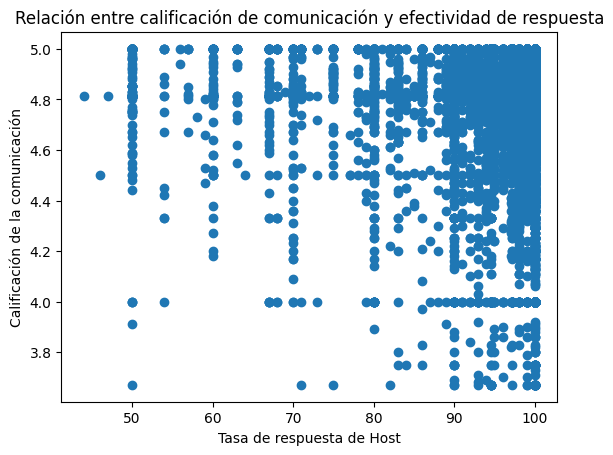

In [258]:
#review_scores_communication y host_response_rate
plt.scatter(mex3["host_response_rate"], mex3["review_scores_communication"])
plt.title("Relación entre calificación de comunicación y efectividad de respuesta")
plt.xlabel("Tasa de respuesta de Host")
plt.ylabel("Calificación de la comunicación")

Tipo de propiedad con número de recamaras

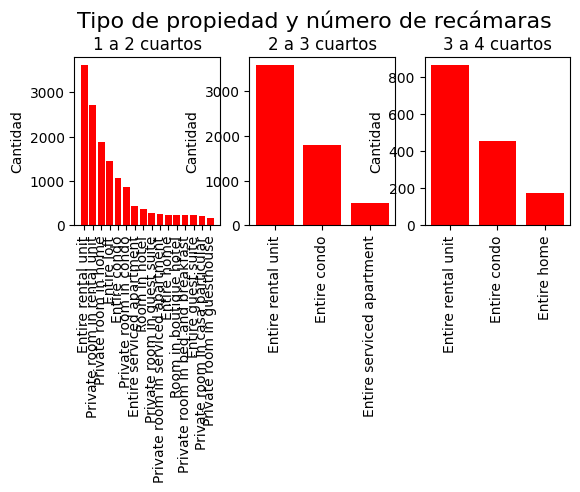

In [259]:
#Categorías por bedrooms

bed1 = mex3[(mex3["bedrooms"] >= 1) & (mex3["bedrooms"] < 2)]
bed2 = mex3[(mex3["bedrooms"] >= 2) & (mex3["bedrooms"] < 3)]
bed3 = mex3[(mex3["bedrooms"] >= 3) & (mex3["bedrooms"] < 4)]
bed4 = mex3[(mex3["bedrooms"] > 5)]

plt.subplot(231)
property_counts = bed1["property_type"].value_counts()
property_counts_filtered = property_counts[property_counts > 150]
plt.bar(property_counts_filtered.index, property_counts_filtered.values, color = "red")
plt.ylabel("Cantidad")
plt.title("1 a 2 cuartos")
plt.xticks(rotation=90)

plt.subplot(232)
property_counts = bed2["property_type"].value_counts()
property_counts_filtered = property_counts[property_counts > 150]
plt.bar(property_counts_filtered.index, property_counts_filtered.values, color = "red")
plt.ylabel("Cantidad")
plt.title("2 a 3 cuartos")
plt.xticks(rotation=90)

plt.subplot(233)
property_counts = bed3["property_type"].value_counts()
property_counts_filtered = property_counts[property_counts > 150]
plt.bar(property_counts_filtered.index, property_counts_filtered.values, color = "red")
plt.ylabel('Cantidad')
plt.title("3 a 4 cuartos")
plt.xticks(rotation=90)

plt.suptitle("Tipo de propiedad y número de recámaras", fontsize=16)

plt.show()


Reviews de cada lugar

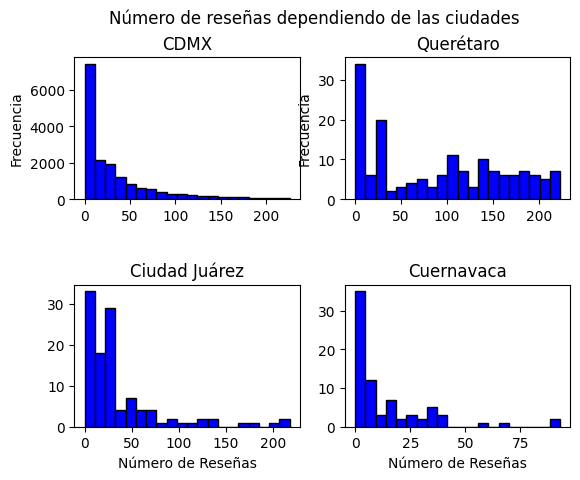

In [261]:
#reviews_per_month
#host_location
mex3["host_location"].value_counts()

cdmx_df = mex3[(mex3["host_location"] == "Mexico City, Mexico") | (mex3["host_location"] == "Mexico") | (mex3["host_location"] == "Federal District, Mexico") | (mex3["host_location"] == "Ciudad de Mexico, Mexico")]
queretaro_df = mex3[mex3["host_location"] == "Santiago de Querétaro, Mexico"]
juarez_df = mex3[mex3["host_location"] == "Naucalpan de Juárez, Mexico"]
cuerna_df = mex3[mex3["host_location"] == "Cuernavaca, Mexico"]

plt.subplot(221)
plt.hist(cdmx_df["number_of_reviews"], bins=20, color='blue', edgecolor='black')
plt.title("CDMX")
plt.ylabel("Frecuencia")

plt.subplot(222)
plt.hist(queretaro_df["number_of_reviews"], bins=20, color='blue', edgecolor='black')
plt.title("Querétaro")
plt.ylabel("Frecuencia")

plt.subplot(223)
plt.hist(juarez_df["number_of_reviews"], bins=20, color='blue', edgecolor='black')
plt.subplots_adjust(wspace=0.2, hspace=0.6)
plt.title("Ciudad Juárez")
plt.xlabel("Número de Reseñas")

plt.subplot(224)
plt.hist(cuerna_df["number_of_reviews"], bins=20, color='blue', edgecolor='black')
plt.title("Cuernavaca")
plt.xlabel("Número de Reseñas")

plt.suptitle("Número de reseñas dependiendo de las ciudades")

plt.show()
